# ARITIFICIAL NEURAL NETWORK (ANN)

##  Importing Libraries

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset

In [ ]:

data = pd.read_csv('diabetic_data_clean.csv')
data.head(10)



,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,15738,63555939,Caucasian,Female,10,3,3,4,12,InternalMedicine,...,No,2,No,No,No,No,No,Ch,Yes,NO
1,40926,85504905,Caucasian,Female,5,1,3,7,7,Family/GeneralPractice,...,No,1,No,No,No,No,No,Ch,Yes,<30
2,42570,77586282,Caucasian,Male,9,1,6,7,10,Family/GeneralPractice,...,No,2,No,No,No,No,No,No,Yes,NO
3,84222,108662661,Caucasian,Female,6,1,1,7,3,Cardiology,...,No,0,No,No,No,No,No,No,Yes,NO
4,236316,40523301,Caucasian,Male,9,1,3,7,6,Cardiology,...,No,0,No,No,No,No,No,Ch,Yes,NO
5,248916,115196778,Caucasian,Female,6,1,1,1,2,Surgery-General,...,No,2,No,No,No,No,No,No,Yes,>30
6,252822,18196434,Caucasian,Female,9,1,2,7,5,Cardiology,...,No,0,No,No,No,No,No,Ch,Yes,>30
7,260166,80845353,Caucasian,Female,8,1,1,7,6,Family/GeneralPractice,...,No,2,No,No,No,No,No,No,Yes,>30
8,325848,63023292,Caucasian,Female,7,1,1,7,2,Cardiology,...,No,1,No,No,No,No,No,Ch,Yes,>30
9,383430,80588529,Caucasian,Female,8,1,2,7,1,Cardiology,...,No,1,No,No,No,No,No,Ch,Yes,>30


# Dropping unnecessary columns

In [ ]:
# Dropping unnecessary columns
data = data.drop(columns=['encounter_id', 'patient_nbr', 'readmitted'])

# Separating features (X) and target (y)
X = data.drop(columns=['insulin'])
y = data['insulin']

In [ ]:
X

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,tolazamide,examide,citoglipton,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,10,3,3,4,12,InternalMedicine,33,3,...,No,No,No,No,No,No,No,No,Ch,Yes
1,Caucasian,Female,5,1,3,7,7,Family/GeneralPractice,60,0,...,No,No,No,No,No,No,No,No,Ch,Yes
2,Caucasian,Male,9,1,6,7,10,Family/GeneralPractice,55,1,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Female,6,1,1,7,3,Cardiology,29,0,...,No,No,No,No,No,No,No,No,No,Yes
4,Caucasian,Male,9,1,3,7,6,Cardiology,64,3,...,No,No,No,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48916,Caucasian,Male,8,2,6,7,6,Emergency/Trauma,46,5,...,No,No,No,No,No,No,No,No,Ch,Yes
48917,Caucasian,Male,9,1,13,7,3,Emergency/Trauma,45,0,...,No,No,No,No,No,No,No,No,Ch,Yes
48918,Caucasian,Female,8,1,22,7,8,InternalMedicine,51,6,...,No,No,No,No,No,No,No,No,No,Yes
48919,Caucasian,Female,8,3,6,1,3,Orthopedics,27,1,...,No,No,No,No,No,No,No,No,Ch,Yes


In [ ]:
y

0        2
1        1
2        2
3        0
4        0
        ..
48916    3
48917    1
48918    2
48919    2
48920    3
Name: insulin, Length: 48921, dtype: int64

# One-hot encoding the categorical features in X

In [ ]:
# One-hot encoding the categorical features in X
X = pd.get_dummies(X, drop_first=True)

# One-hot encoding the target variable
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output for version 1.5.2
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))


# Splitting the dataset into train and test sets

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# Scaling the features

In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Artificial Neural Network model

In [ ]:
# Building the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])


C:\Users\shakkerar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling the model

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Training the model

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
979/979 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5192 - loss: 1.1724 - val_accuracy: 0.7061 - val_loss: 0.6365
Epoch 2/50
979/979 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7179 - loss: 0.6233 - val_accuracy: 0.7434 - val_loss: 0.5766
Epoch 3/50
979/979 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7487 - loss: 0.5397 - val_accuracy: 0.7524 - val_loss: 0.5554
Epoch 4/50
979/979 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7690 - loss: 0.4869 - val_accuracy: 0.7485 - val_loss: 0.5532
Epoch 5/50
979/979 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7765 - loss: 0.4614 - val_accuracy: 0.7386 - val_loss: 0.5598
Epoch 6/50
979/979 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7868 - loss: 0.4416 - val_accuracy: 0.7556 - val_loss: 0.5704
Epoch 7/50
979/979 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7988 - loss: 0.4246 - val_accuracy: 0.7504 - val_loss: 0.5859
Epoch 8/50
979/979 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8045 - loss: 0.4051 - val_accuracy: 

# Evaluating the model on the test set

In [ ]:
# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Test Loss: 1.8525
Test Accuracy: 0.7486


# Making predictions

In [ ]:
# Making predictions
y_pred_proba = model.predict(X_test)
y_pred_class = np.argmax(y_pred_proba, axis=1)
y_true_class = np.argmax(y_test, axis=1)


306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Generating evaluation metrics

In [ ]:
# Generating evaluation metrics
print("\nClassification Report:")
print(classification_report(y_true_class, y_pred_class))



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4471
           1       0.45      0.38      0.41      1251
           2       0.75      0.78      0.77      2977
           3       0.41      0.41      0.41      1086

    accuracy                           0.75      9785
   macro avg       0.63      0.62      0.62      9785
weighted avg       0.74      0.75      0.74      9785



# Confusion matrix

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true_class, y_pred_class)
print("\nConfusion Matrix:")
print(cm)



Confusion Matrix:
[[4090   54  285   42]
 [  72  471  262  446]
 [ 329  171 2323  154]
 [  75  345  225  441]]


# Visualizing the confusion matrix

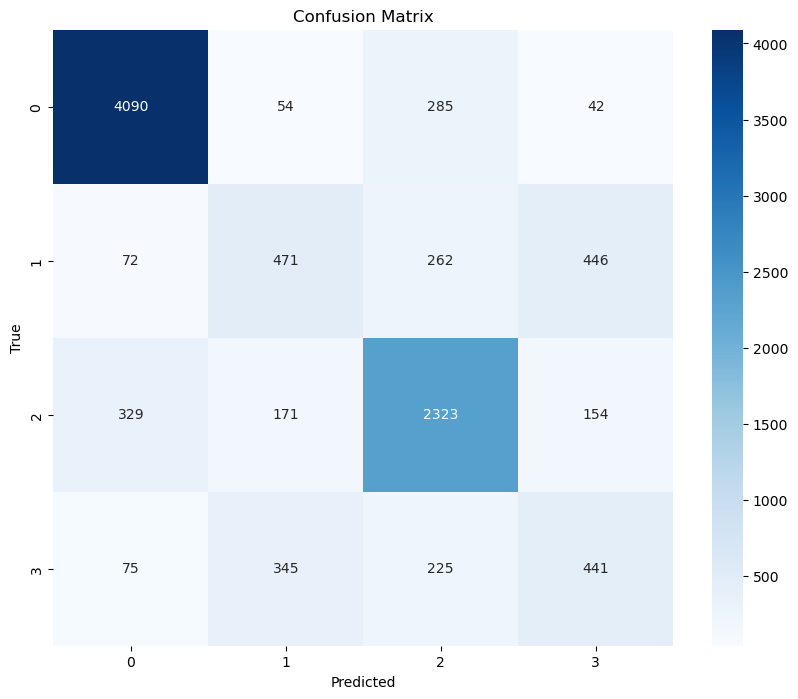

In [ ]:
# Visualizing the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# 1. LightGBM

## Metrics:

- Accuracy: 80.8%

- F1 Score: 80.84%

- ROC-AUC: 95.53%




# 2. ANN

## Metrics:

- Accuracy: 74.86%

- F1 Score (approximate based on classification report): ~74%

- Test Loss: 1.85

## Classification Report:

- Class 0: Precision 90%, Recall 91%, F1-Score 91%

- Class 1: Precision 45%, Recall 38%, F1-Score 41%

- Class 2: Precision 75%, Recall 78%, F1-Score 77%

- Class 3: Precision 41%, Recall 41%, F1-Score 41%

### Confusion Matrix: Shows balanced performance but struggles with recall in Class 1.

## Observations:

- Strengths: Comparable performance across classes, particularly for minority class (Class 3).

- Weaknesses: Slightly lower accuracy and F1 Score compared to LightGBM.

## Which Model is Better?

- LightGBM is better for this dataset as it provides:
    
- Higher overall accuracy.

- Better F1 scores for most classes.

- Superior ROC-AUC, indicating better probabilistic predictions.

- ANN performs slightly better in balancing recall and precision for minority classes (like Class 3).
